<a href="https://colab.research.google.com/github/gnatnib/machine_learning_practicum/blob/main/water_quality_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas**


*   Lakukan Eksplorasi terhadap algoritma klasifikasi lain yang ada
*   Buatlah evaluasi algoritma dengan dataset yang telah dicoba pada tugas praktikum sebelumnya(menggunakan 3 model yaitu KNN, NB, dan SVM)!

# **Dibuat Oleh: Bintang Syafrian Rizal - 24060122120031**


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#load dataset
df = pd.read_csv('/content/sample_data/water_potability.csv')


In [ ]:
#drop kolom tidak penting dan gunakan SimpleImputer dengan median untuk handle missing values
imputer = SimpleImputer(strategy='median')
X = df.drop('Potability', axis=1)
y = df['Potability']
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [ ]:
#scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#bagi dataset menjadi training dan validasi
validation_size = 0.2
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = validation_size, random_state = seed)

<Axes: >

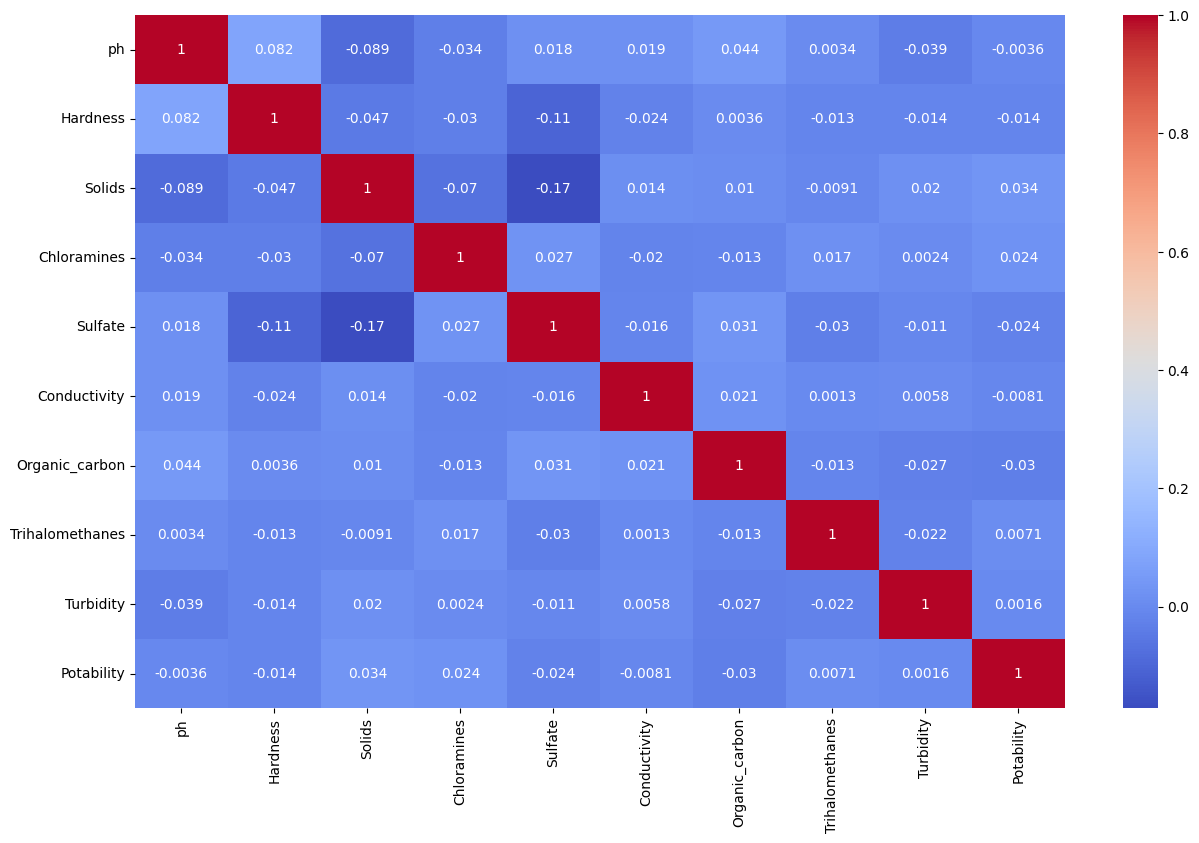

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

In [ ]:
#Buat model
models = [
    ('KNN', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('SVM', SVC()),
    ('DecisionTreeClassifier', DecisionTreeClassifier())
]

In [ ]:
#Cross-validation evaluation
print("Cross-validation results:")
for name, model in models:
  kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = 'accuracy')
  print(f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})")

Cross-validation results:
KNN: 0.6363 (0.0270)
Naive Bayes: 0.6191 (0.0149)
SVM: 0.6748 (0.0191)
DecisionTreeClassifier: 0.5908 (0.0189)


In [ ]:
#Evaluasi Validation Set
print("Validation set results:")
for name, model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  print(f"\n{name} Results:")
  print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
  print("Confusion Matrix:")
  print(confusion_matrix(y_test, y_pred))
  print("Classification Report:")
  print(classification_report(y_test, y_pred))

Validation set results:

KNN Results:
Accuracy: 0.6311
Confusion Matrix:
[[312 100]
 [142 102]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.76      0.72       412
           1       0.50      0.42      0.46       244

    accuracy                           0.63       656
   macro avg       0.60      0.59      0.59       656
weighted avg       0.62      0.63      0.62       656


Naive Bayes Results:
Accuracy: 0.6311
Confusion Matrix:
[[361  51]
 [191  53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.88      0.75       412
           1       0.51      0.22      0.30       244

    accuracy                           0.63       656
   macro avg       0.58      0.55      0.53       656
weighted avg       0.60      0.63      0.58       656


SVM Results:
Accuracy: 0.6921
Confusion Matrix:
[[376  36]
 [166  78]]
Classification Report:
              precision    re

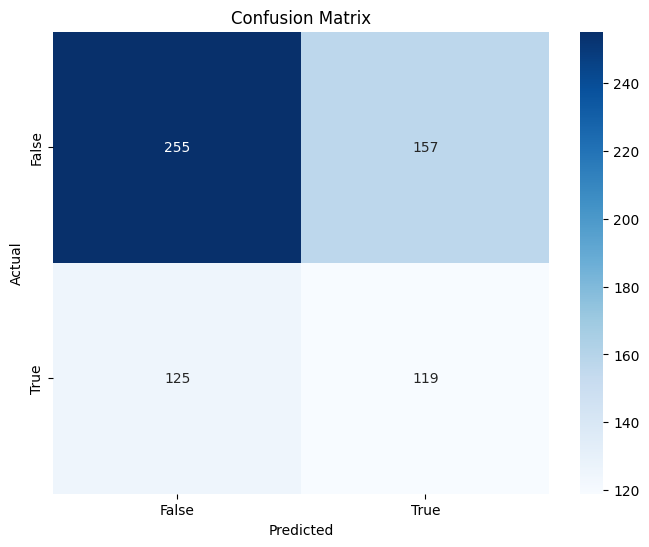

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Link Github: https://github.com/gnatnib/machine_learning_practicum**